<a href="https://colab.research.google.com/github/MajdQ93/wifi_localization/blob/main/content_wifi_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

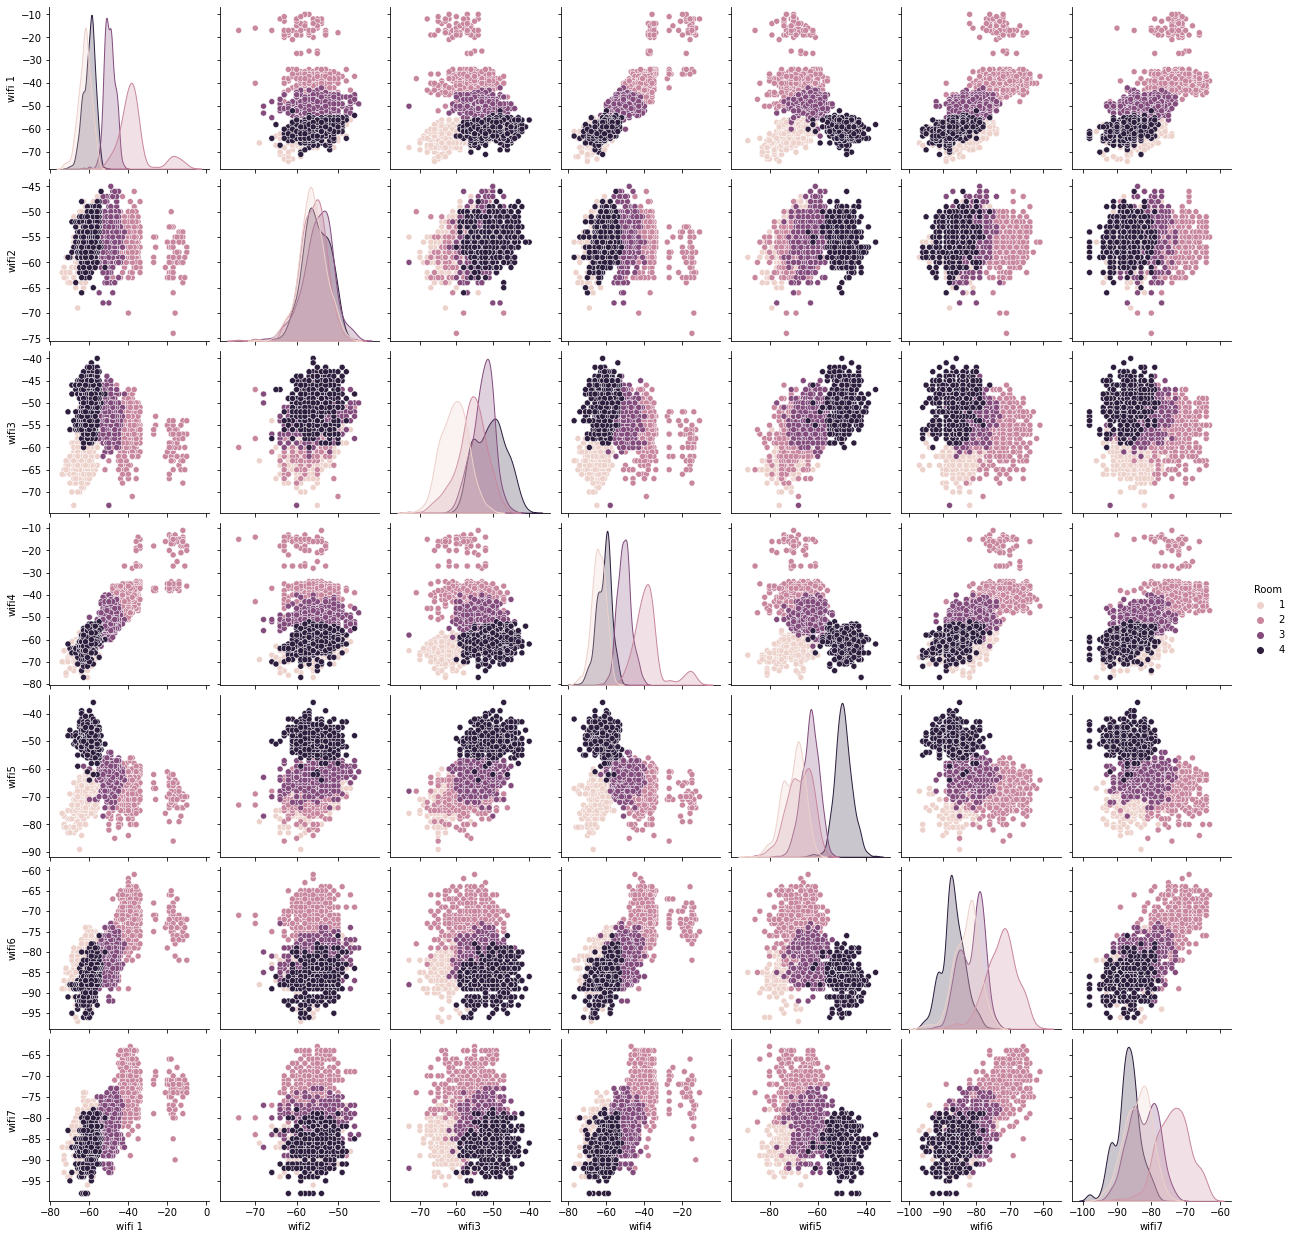

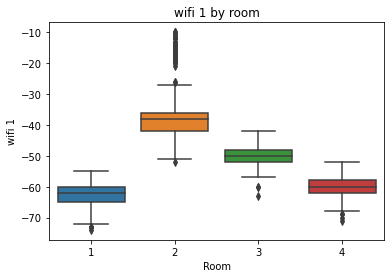

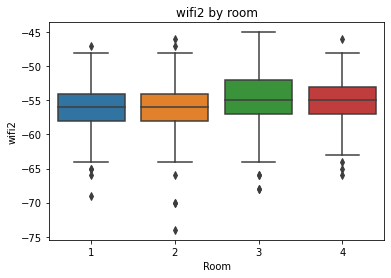

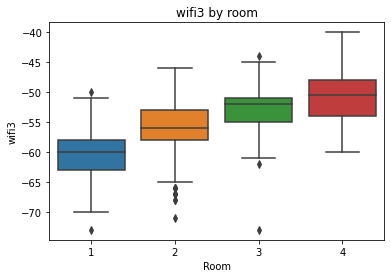

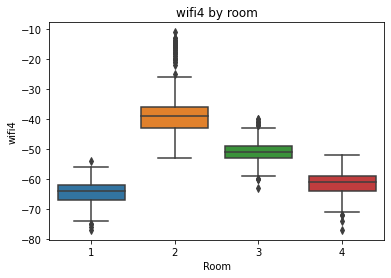

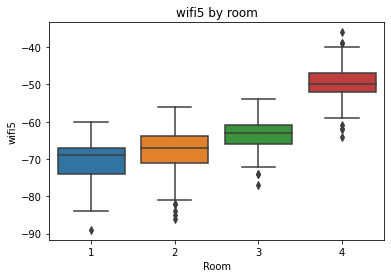

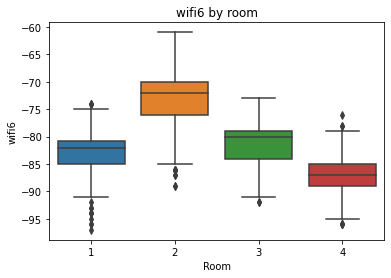

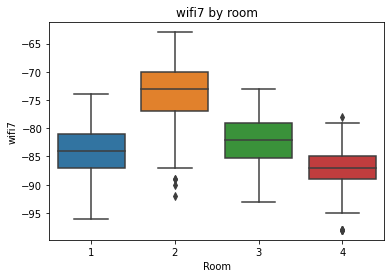

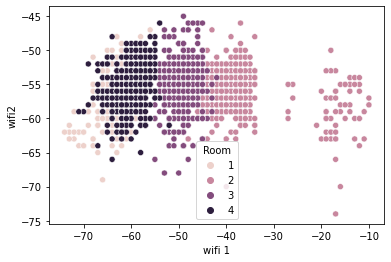

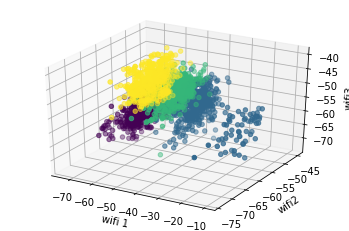

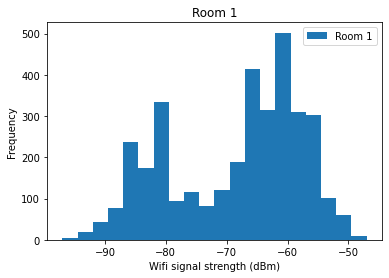

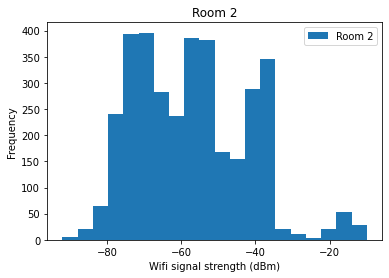

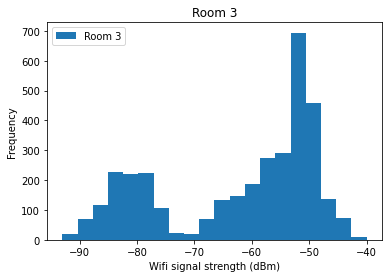

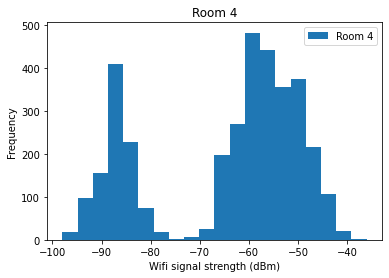

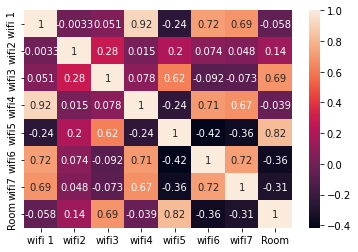

Accuracy-KNN: 0.985
Accuracy-SVM: 0.9825
Accuracy-NN: 0.9725
Accuracy-GBM: 0.9725


In [11]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import data_Set
dataset=pd.read_csv('/content/wifi_localization.csv')


# Visualize the distribution of the data
sns.pairplot(dataset, hue='Room')
plt.show()

# Create a box plot for each wifi device and room
for i in range(1, 8):
    plt.figure()
    sns.boxplot(x='Room', y=dataset.columns[i-1], data=dataset)
    plt.title(f'{dataset.columns[i-1]} by room')
    plt.show()
    plt.close()

# Create a scatter plot for two wifi devices
wifi1 = dataset.columns[0]
wifi2 = dataset.columns[1]
sns.scatterplot(x=wifi1, y=wifi2, hue='Room', data=dataset)
plt.xlabel(wifi1)
plt.ylabel(wifi2)
plt.show()

# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot for three wifi devices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
wifi1 = dataset.columns[0]
wifi2 = dataset.columns[1]
wifi3 = dataset.columns[2]
ax.scatter(dataset[wifi1], dataset[wifi2], dataset[wifi3], c=dataset['Room'])
ax.set_xlabel(wifi1)
ax.set_ylabel(wifi2)
ax.set_zlabel(wifi3)
plt.show()


for i in range(1, 5):
    # Create a new figure
    plt.figure()
    
    # Create a histogram for the current room
    plt.hist(dataset[dataset['Room'] == i].iloc[:, :-1].values.ravel(), bins=20, label=f'Room {i}')
    plt.legend()
    plt.title(f'Room {i}')
    plt.xlabel('Wifi signal strength (dBm)')
    plt.ylabel('Frequency')

    # Show the figure
    plt.show()
    
    # Close the figure
    plt.close()

# Create a heatmap of the correlation between the wifi devices
sns.heatmap(dataset.corr(), annot=True)
plt.show()


# Split the dataset into features and labels
X = dataset.iloc[:, :-1] # features
y = dataset.iloc[:, -1] # labels

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print("Accuracy-KNN:", acc)

# Create the SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print("Accuracy-SVM:", acc)

# Create the Neural Network classifier with one hidden layer of 100 neurons
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Fit the classifier to the training data
nn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = nn.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print("Accuracy-NN:", acc)

# Create the GBM classifier with 100 estimators
gbm = GradientBoostingClassifier(n_estimators=100)

# Fit the classifier to the training data
gbm.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = gbm.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print("Accuracy-GBM:", acc)
